In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [2]:
# set up display area to show dataframe in jupyter qtconsole
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
raw_train_data = pd.read_csv('train.csv')

In [5]:
raw_train_data = train_df.copy()

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [9]:
train_df.describe(include=[object]).T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [10]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


In [11]:
test_df.describe(include='object').T

,count,unique,top,freq
MSZoning,1455,5,RL,1114
Street,1459,2,Pave,1453
Alley,107,2,Grvl,70
LotShape,1459,4,Reg,934
LandContour,1459,4,Lvl,1311
Utilities,1457,1,AllPub,1457
LotConfig,1459,5,Inside,1081
LandSlope,1459,3,Gtl,1396
Neighborhood,1459,25,NAmes,218
Condition1,1459,9,Norm,1251


<AxesSubplot:>

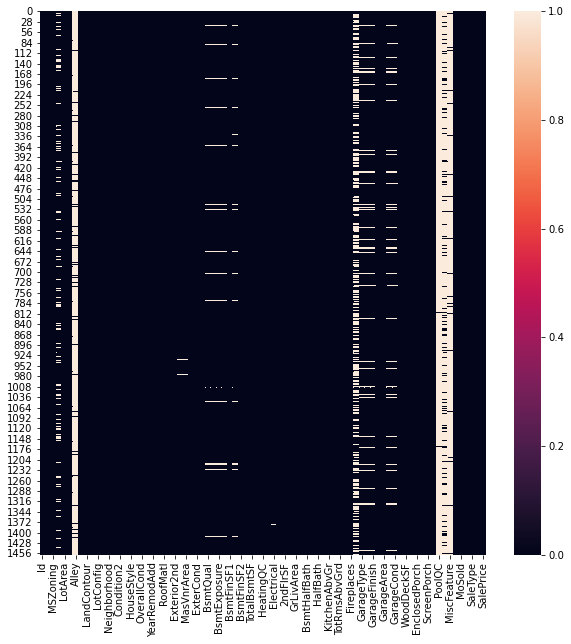

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.isnull())

In [13]:
def missing_values_density(df):
    # get the count of missing values
    missing_values = df.isnull().sum()
    # get features with missing values greater than 0 
    missing_values = missing_values[missing_values > 0]
    # sort in descending order 
    missing_values.sort_values(inplace = True, ascending = False)
    missing = pd.DataFrame()
    missing["Features"] = missing_values.index
    missing["Count"] = missing_values.values
    missing["Percentage"] = missing_values.values / train_df.shape[0] * 100
    return missing

In [14]:
missing_data_train = missing_values_density(train_df)
missing_data_train

,Features,Count,Percentage
0,PoolQC,1453,99.520548
1,MiscFeature,1406,96.301370
2,Alley,1369,93.767123
3,Fence,1179,80.753425
4,FireplaceQu,690,47.260274
5,LotFrontage,259,17.739726
6,GarageYrBlt,81,5.547945
7,GarageType,81,5.547945
8,GarageFinish,81,5.547945
9,GarageQual,81,5.547945


<AxesSubplot:xlabel='Count', ylabel='Features'>

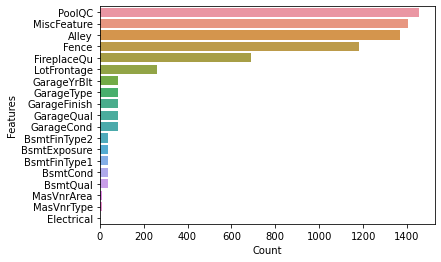

In [15]:
sns.barplot(y = "Features", x = "Count", data = missing_data_train)

In [16]:
missing_data_test = missing_values_density(test_df)

<AxesSubplot:xlabel='Count', ylabel='Features'>

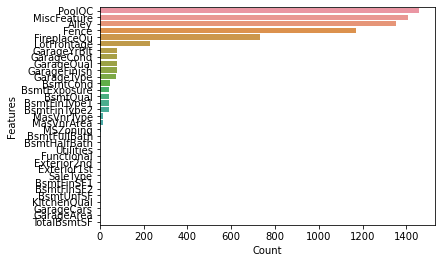

In [17]:
sns.barplot(y = "Features", x = "Count", data = missing_data_test)

In [18]:
missing_data_train[missing_data_train['Percentage'] > 50]['Features']

0         PoolQC
1    MiscFeature
2          Alley
3          Fence
Name: Features, dtype: object

In [19]:
missing_data_test[missing_data_test['Percentage'] > 50]['Features']

0         PoolQC
1    MiscFeature
2          Alley
3          Fence
Name: Features, dtype: object

In [20]:
features_to_dropped = ['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt']

In [21]:
train_df = train_df.drop(columns=features_to_dropped)

In [68]:
train_df['LotArea']

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [22]:
train_df['LotArea'] = train_df['LotArea'].fillna(train_df['LotArea'].mean())
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())

In [23]:
train_df['GarageType'] = train_df.loc[:, 'GarageType'].fillna('None')
train_df['GarageFinish'] = train_df.loc[:, 'GarageFinish'].fillna('None')
train_df['GarageQual'] = train_df.loc[:, 'GarageQual'].fillna('None')
train_df['GarageCond'] = train_df.loc[:, 'GarageCond'].fillna('None')
train_df['FireplaceQu'] = train_df.loc[:, 'FireplaceQu'].fillna('None')
train_df['BsmtExposure'] = train_df.loc[:, 'BsmtExposure'].fillna('None')
train_df['BsmtFinType2'] = train_df.loc[:, 'BsmtFinType2'].fillna('None')
train_df['BsmtQual'] = train_df.loc[:, 'BsmtQual'].fillna('None')
train_df['BsmtCond'] = train_df.loc[:, 'BsmtCond'].fillna('None')
train_df['BsmtFinType1'] = train_df.loc[:, 'BsmtFinType1'].fillna('None')
train_df['MasVnrType'] = train_df.loc[:, 'MasVnrType'].fillna('None')
train_df['Electrical'] = train_df.loc[:, 'Electrical'].fillna('SBrkr') #replaced with mode

<AxesSubplot:>

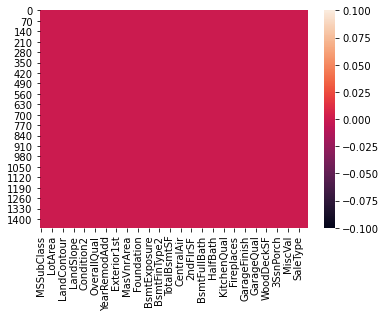

In [24]:
sns.heatmap(train_df.isnull())

In [25]:
print("Shape of original dataset - ", raw_train_data.shape)
print("Shape of dataset after handling missing values - ", train_df.shape)
print(f"Percentage of data dropped - {(raw_train_data.shape[1] - train_df.shape[1]) / raw_train_data.shape[1] * 100}%")

Shape of original dataset -  (1460, 81)
Shape of dataset after handling missing values -  (1460, 75)
Percentage of data dropped - 7.4074074074074066%


In [26]:
# Get list of  features with datatype as object
categorical_features = [c for c in train_df.columns.values if train_df[c].dtype == "object" or train_df[c].dtype.name == 'category' ]
print(categorical_features)
print(len(categorical_features))

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
39


In [27]:
# Function to convert datatype to category
def convert_to_category(data, features):
    for feature in features:
        data[feature] = data[feature].astype('category')
        
    return data

In [28]:
col_to_category = ['MSSubClass', 'MSZoning']
# Converting object type to categorical
train_df = convert_to_category(train_df, col_to_category)

In [29]:
# Converting object type to categorical
train_df = convert_to_category(train_df, categorical_features)

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   Utilities      1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  Condition1     1460 non-null   category
 12  Condition2     1460 non-null   category
 13  BldgType       1460 non-null   category
 14  HouseStyle     1460 non-null   category
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

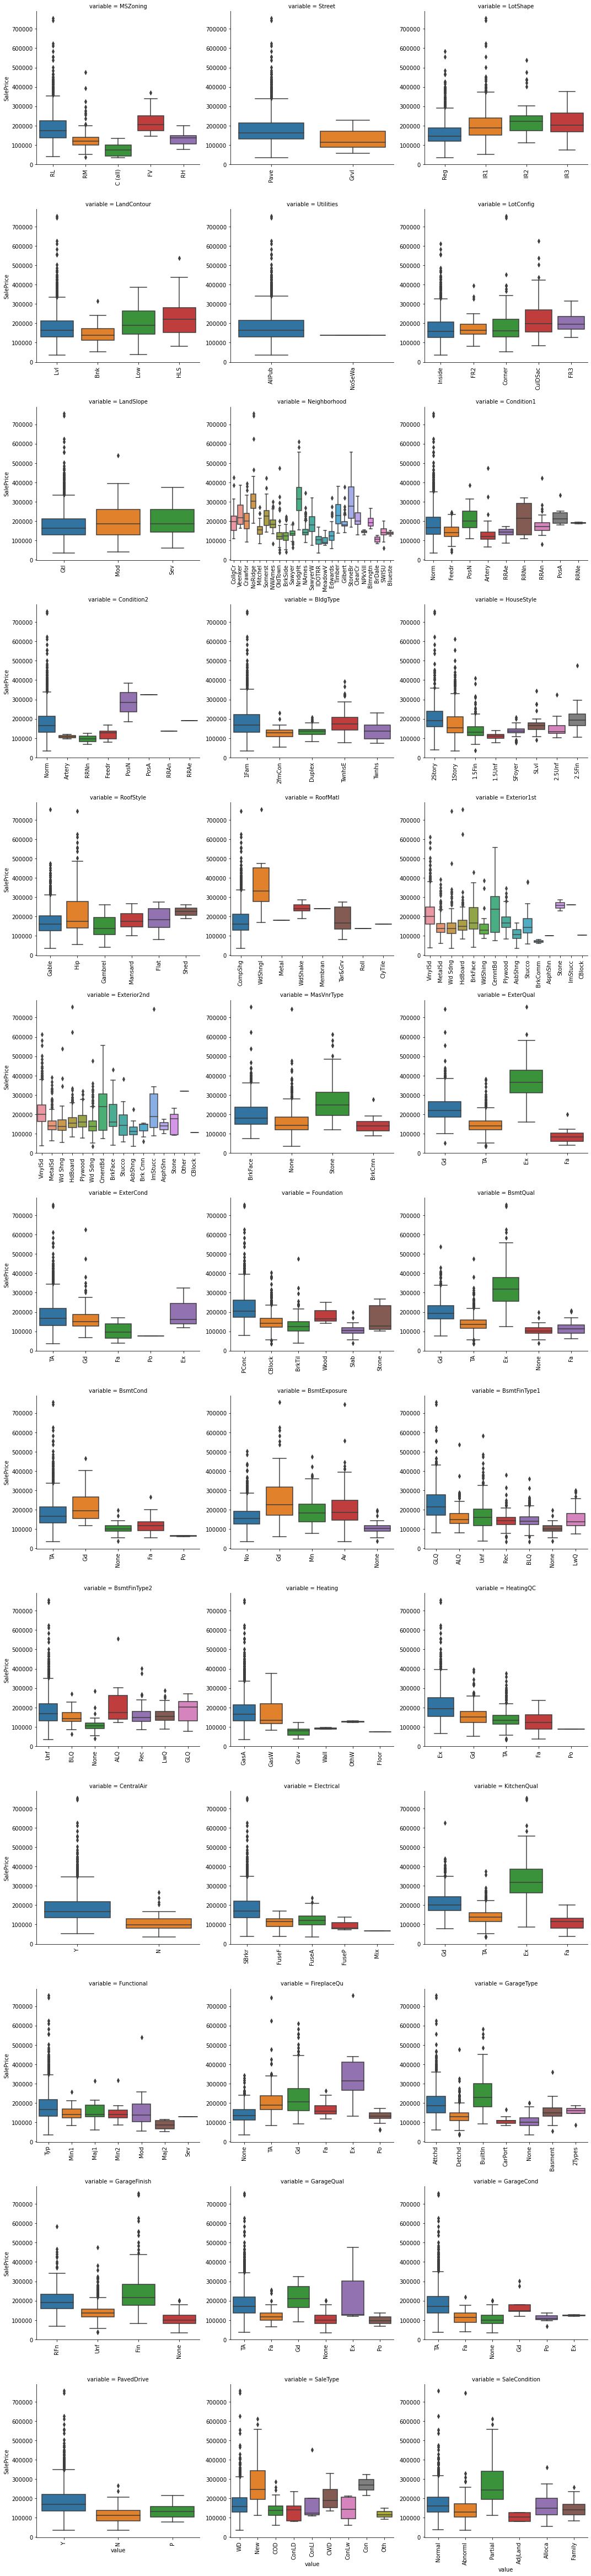

In [31]:
# Function to plot categorical features with respect to SalePrice
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
# Visualize categorical features wrt SalePrice
f = pd.melt(train_df, id_vars=['SalePrice'], value_vars = categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height = 5)
g = g.map(boxplot, "value", "SalePrice")

In [32]:
# Get numeric features
numeric_features = [c for c in train_df.columns.values if train_df[c].dtype != "object" and  train_df[c].dtype.name != 'category']
print(numeric_features)
print(len(numeric_features))

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
35


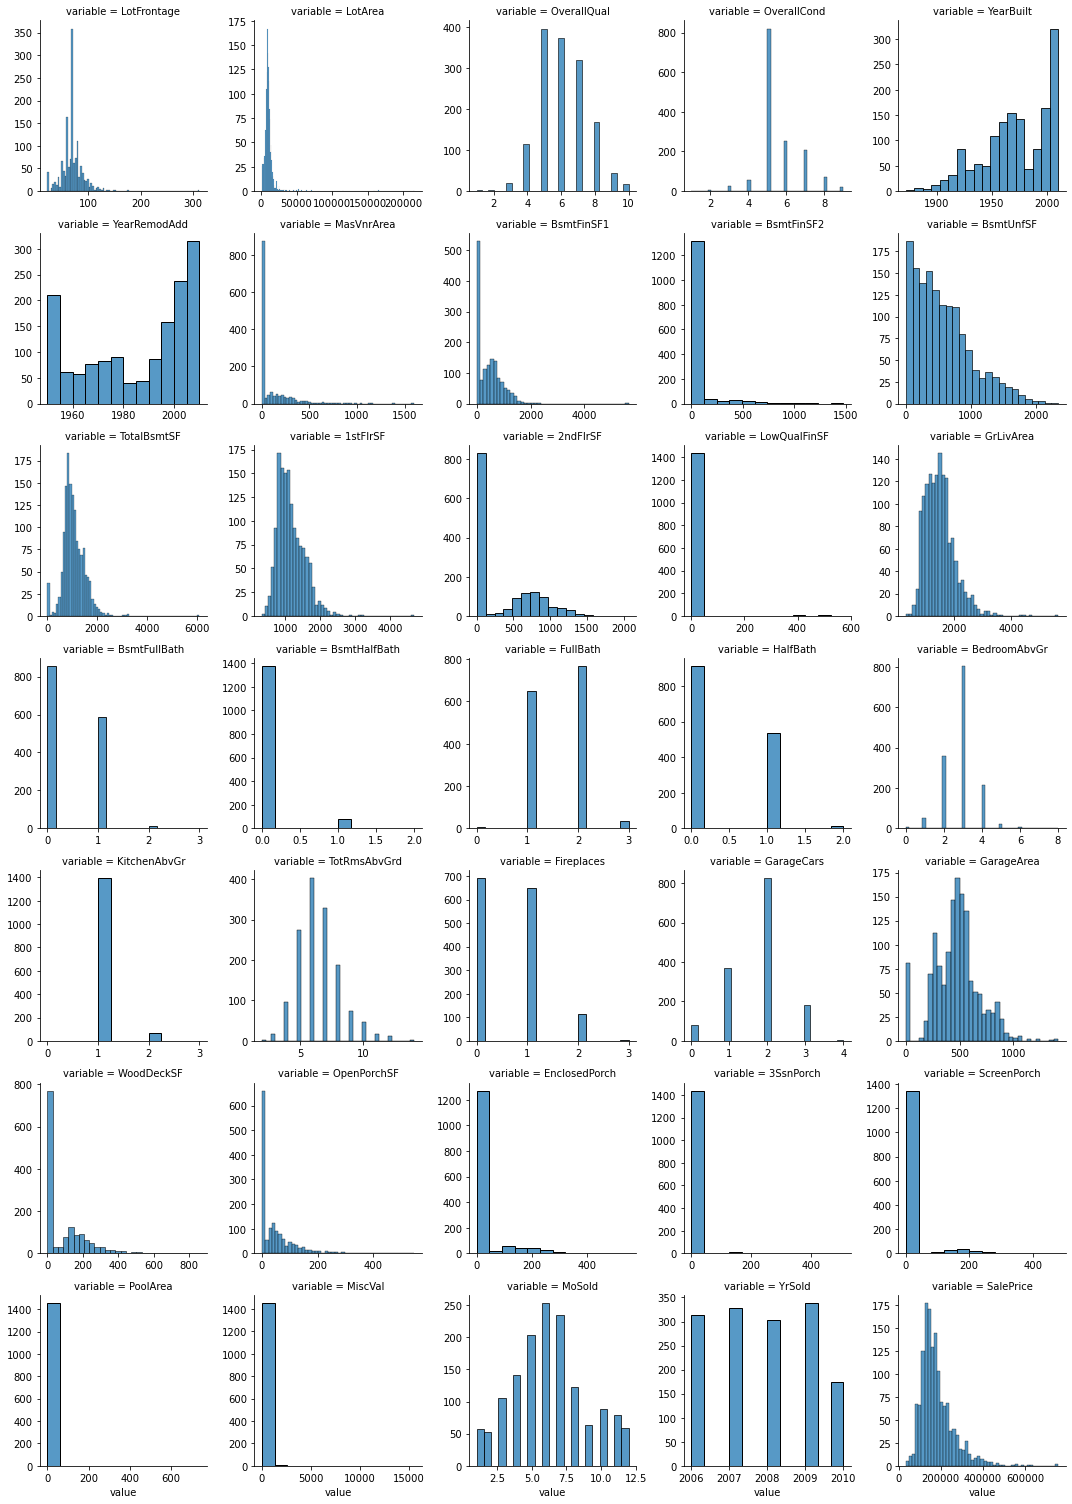

In [33]:
# Plot histplot of all numeric features
f = pd.melt(train_df, value_vars = numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.histplot, "value")

### Data Preparation for Model Building

In [34]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']
y = np.log(y)

In [35]:
y.shape

(1460,)

In [36]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [37]:
numeric_features.pop()

'SalePrice'

In [38]:
numeric_data = X[numeric_features]

In [39]:
numeric_data

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007
1456,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010
1457,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010
1458,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010


In [40]:
scaler = StandardScaler()
scaler.fit(numeric_data)
numeric_data = scaler.transform(numeric_data)

In [41]:
numeric_data = pd.DataFrame(numeric_data, columns = numeric_features)
numeric_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [42]:
X[numeric_features] = numeric_data

In [43]:
X = pd.get_dummies(X)
X

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,Fir

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1168, 298)
X_test : (292, 298)
y_train : (1168,)
y_test : (292,)


### ML Models

In [45]:
# Dataframe to store RMSE of all models
ml_comp_report = pd.DataFrame(columns = ['Model', 'train_rmse', 'test_rmse'])

In [46]:
# Function to calculate RMSE
def rmse(actual, pred):
    return np.sqrt(mean_squared_error(actual, pred))

In [47]:
# Function to plot actual and predicted value 
def scatter_plot(actual, pred, plot_title):
    plt.scatter(actual, pred)
    plt.title(plot_title)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

### Linear Regression

In [48]:
# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [49]:
# Test model
y_train_lr = lin_reg.predict(X_train)
y_pred = lin_reg.predict(X_test)

In [50]:
# Get rmse score
print("Train RMSE Score : ", rmse(y_train, y_train_lr))
print("Test RMSE Score : ", rmse(y_test, y_pred))

Train RMSE Score :  0.09059664582661588
Test RMSE Score :  906263312.9344348


In [51]:
ml_comp_report.loc[ml_comp_report.shape[0]] = ['lin_reg', rmse(y_train, y_train_lr), rmse(y_test, y_pred)]

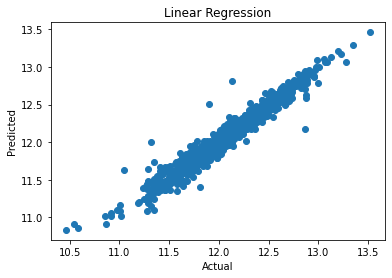

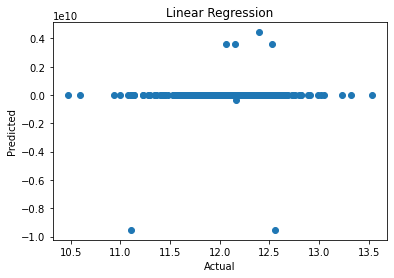

In [52]:
scatter_plot(y_train, y_train_lr, "Linear Regression")
scatter_plot(y_test, y_pred, "Linear Regression")

### Ridge Regression

In [53]:
# Train the model
ridge_reg = RidgeCV(alphas = [1e-3, 1e-2, 1e-1, 1])
ridge_reg.fit(X_train, y_train)

RidgeCV(alphas=array([0.001, 0.01 , 0.1  , 1.   ]))

In [54]:
# Test model
y_train_rg = ridge_reg.predict(X_train)
y_pred_rg = ridge_reg.predict(X_test)

In [55]:
# Get rmse score
train_rmse_rg = rmse(y_train, y_train_rg)
print("Train RMSE Score : ", train_rmse_rg)
test_rmse_rg = rmse(y_test, y_pred_rg)
print("Test RMSE Score : ", test_rmse_rg)

Train RMSE Score :  0.09804929045219406
Test RMSE Score :  0.13029103189808156


In [56]:
ml_comp_report.loc[ml_comp_report.shape[0]] = ['ridge_reg', train_rmse_rg, test_rmse_rg]

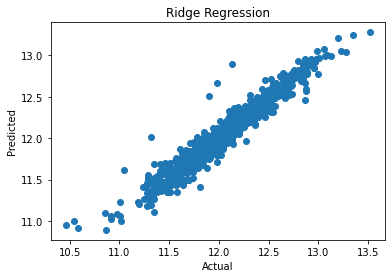

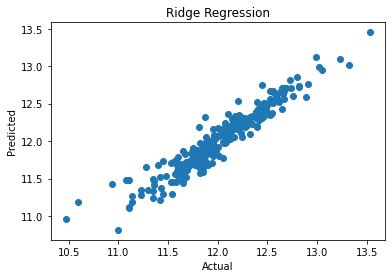

In [57]:
scatter_plot(y_train, y_train_rg, "Ridge Regression")
scatter_plot(y_test, y_pred_rg, "Ridge Regression")

### XGBoost

#### Hyperparameter Tuning

In [58]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = xgb.XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [59]:
best_params = hyperParameterTuning(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 10.8min finished


In [60]:
best_params

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [61]:
# Train the model on best parameters
xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.1,
        max_depth = 3,
        min_child_weight = 3,
        n_estimators = 500,
        subsample = 0.7)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
# Test model
y_train_xg = xgb_model.predict(X_train)
y_pred_xg = xgb_model.predict(X_test)

In [63]:
# Get rmse score
train_rmse_xg = rmse(y_train, y_train_xg)
print("Train RMSE Score : ", train_rmse_xg)
test_rmse_xg = rmse(y_test, y_pred_xg)
print("Test RMSE Score : ", test_rmse_xg)

Train RMSE Score :  0.03884948765441303
Test RMSE Score :  0.13760759738816433


In [64]:
ml_comp_report.loc[ml_comp_report.shape[0]] = ['xgb_reg', train_rmse_xg, test_rmse_xg]

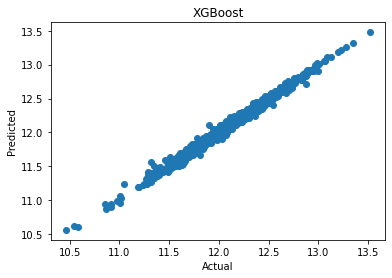

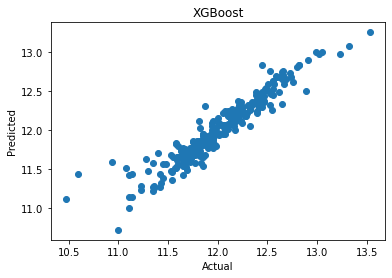

In [65]:
scatter_plot(y_train, y_train_xg, "XGBoost")
scatter_plot(y_test, y_pred_xg, "XGBoost")

### Model Comparison

In [66]:
ml_comp_report

,Model,train_rmse,test_rmse
0,lin_reg,0.090597,9.062633e+08
1,ridge_reg,0.098049,1.302910e-01
2,xgb_reg,0.038849,1.376076e-01


In [67]:
best_model = xgb_model

### Submission Preparation